In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')

In [3]:
X = dataset[['Age','EstimatedSalary']]
y = dataset['Purchased']

In [4]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [5]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [6]:
svm = LinearSVC()
svm.fit(x_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [7]:
y_pred = svm.predict(x_test)

In [8]:
accuracy_score(y_test,y_pred)

0.87

In [9]:
from matplotlib.colors import ListedColormap

In [10]:
setX, setY = x_train, y_train

In [14]:
start = setX[:,0].min() - 1

In [15]:
stop = setX[:,0].max() + 1

In [18]:
x1 = np.arange(start, stop, step=0.01)

In [19]:
start = setX[:,1].min() - 1
stop = setX[:,1].max() + 1

In [20]:
x2 = np.arange(start, stop, step=0.01)

In [22]:
xx,yy = np.meshgrid(x1,x2)

In [23]:
z = svm.predict(np.array([xx.ravel(), yy.ravel()]).T).reshape(xx.shape)

In [24]:
z

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]], dtype=int64)

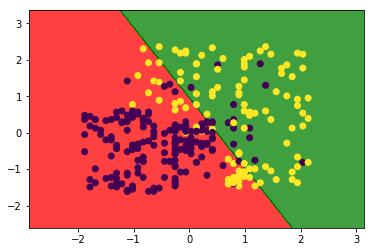

In [26]:
plt.contourf(xx, yy, z, alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(),yy.max())
plt.scatter(x_train[:,0],x_train[:,1],c=y_train)
plt.show()

In [27]:
svm.coef_

array([[0.78177937, 0.40481309]])